In [16]:
! pip install tensorflow

#### < 패키지 준비 >

In [17]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

print(tf.__version__)

2.3.1


#### < 데이터셋 준비 >

In [2]:
# 매개변수 num_words=10000은 훈련 데이터에서 가장 많이 등장하는 
# 상위 10,000개의 단어를 선택
# 데이터 크기를 적당하게 유지하기 위해 드물에 등장하는 단어는 제외

In [3]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#### < 데이터 탐색 >

In [4]:
#이 데이터셋의 샘플은 전처리된 정수 배열
#이 정수는 영화 리뷰에 나오는 단어를 나타냄

In [5]:
type(train_data)

numpy.ndarray

In [6]:
# 레이블(label)은 정수 0 또는 1
# 0은 부정적인 리뷰, 1은 긍정적인 리뷰

In [7]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [8]:
print("훈련샘플:{}, 레이블:{}".format(len(train_data),len(train_labels)))

훈련샘플:25000, 레이블:25000


In [9]:
# 첫번째 리뷰 확인
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [10]:
# 영화 리뷰들은 길이가 각기 다름
# 신경망의 입력 데이터의 길이가 같아야 하므로 이는 추후 조정이 필요

In [11]:
len(train_data[0]),len(train_data[2])

(218, 141)

#### < 정수를 단어로 변환 >

In [13]:
# 단어와 정수 인덱스를 맵핑한 딕셔너리
word_index = imdb.get_word_index()

In [14]:
word_index = { k:(v+3) for k,v in word_index.items() }

# 처음 몇 개 인덱스는 사전에 정의되어 있음
# 아래의 4개 단어를 추가하기 위해 위의 for문으로 인덱스 값을 변경해 준 것
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [ ]:
# 키 값으로 숫자를 사용하기 위해 key와 value 위치를 바꿔줌

In [15]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
# get(키값, 디폴트값 설정)

In [18]:
def decode_review(text):
    return ''.join([reverse_word_index.get(i,"?") for i in text])

In [19]:
decode_review(train_data[0])

"<START>thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert<UNK>isanamazingactorandnowthesamebeingdirector<UNK>fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor<UNK>andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso<UNK>tothetwolittleboy'sthatplayedthe<UNK>ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe<UNK>listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

#### < 데이터 준비 >

In [51]:
# 리뷰(정수 배열)는 신경망에 주입하기 전에 텐서로 변환되어야 함
# 변환 방법에는 몇 가지가 있음

In [52]:
# 원핫 인코딩 : 이 방법은 NUM_WORDS * NUM_REVIEWS 크기의 행렬이 필요하므로 메모리를 많이 사용

In [53]:
# 정수 배열의 길이가 모두 같도록 패딩 (PADDING)을 추가해 MAX_LENGTH * NUM_REVIEWS 크기의 텐서 생성
# 이런 형태으 텐서를 다룰 수 있는 임베딩(EMVEDDING)층을 신경망의 첫번째 층으로 사용가능

# 영화 리뷰의 길이가 같아야 하므로 pad_sequence 함수를 사용하여 길이를 맞춤

In [24]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
             value=word_index["<PAD>"], padding='post', maxlen=256)

In [54]:
# 이 함수는 num_samples개의 시퀀스(정수 리스트)의 리스트를 
# (num_samples, num_timesteps) 형태의 2D Numpy 배열로 변형

In [55]:
# num_timesteps 보다 짧은 시퀀스는 그 끝에 value 값이 패딩됨
# num_timesteps보다 긴 시퀀스는 원하는 길이에 맞도록 절단됨 

# padding과 truncating 인수에 따라 각각 패딩과 절단이 어디서 일어나는지 결정

In [56]:
# padding : 각 시퀀스의 처음(pre) 혹은 끝(post)을 패딩
# truncating : maxlen보다 큰 시퀀스의 처음(pre) 혹은 끝(post)의 값들을 제거
# value: 부동소수점 혹은 문자열, 패딩할 값

In [25]:
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
            value=word_index["<PAD>"], padding='post', maxlen=256)

In [57]:
# 길이가 일정해 진것을 확인

In [26]:
len(train_data[0]), len(train_data[2])

(256, 256)

In [58]:
# 리뷰의 맨 끝에 0값 ("<PAD>")이 입력 된 것을 확인 할 수 있음

In [27]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

#### < 모델 구성 >

In [59]:
# 신경망은 층을 쌓아서 만들기 때문에 아래의 두 가지를 결정 해야 함
# - 모델에서 얼마나 많은 층(layer)을 사용할 것인가
# - 각 층에서 얼마나 많은 은닉 유닛 (hidden unit)을 사용할 것인가

###### - 예제 -

In [28]:
# 입력 크기는 영화리뷰 데이터셋에 적용된 어휘 사전의 크기 (10,000개의 단어)
vocab_size = 10000

In [29]:
model = keras.Sequential()

model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [30]:
# 층을 순서대로 쌓아 분류기 (classifier)를 만듦
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Embedding 층 : 정수로 인코딩된 단어를 입력받고 각 단어 인덱스에 해당하는 임베딩 벡터를 찾음
# 이 벡터는 모델이 훈련되면서 학습됨. 이 벡터는 출력 배열에 새로운 차원으로 추가됨
# 최종차원은 (batch, sequence, embedding)이 됨

In [61]:
# GlobalAveragePooling1D 층 : sequence 차원에 대해 평균을 계산하여 
# 각 샘플에 대해 고정된 길이의 출력 벡터를 반환함 
# (길이가 다른 입력을 다루는 가장 간단한 방법)

In [62]:
# 이 고정길이의 출력 벡터는 16개의 은닉 유닛을 가진 완전연결 층을 거침

In [63]:
# 하나의 출력 노드를 가진 완전연결 층
# sigmoid 활성화 함수를 사용하여 0과 1 사이의 실수를 출력
# 이 값은 확률 또는 신뢰도를 나타냄

#### - 은닉 유닛 -

In [64]:
# 위 모델에는 입력과 출력 사이에 두개의 중간 또는 "은닉"층이 존재
# 출력의 개수는 층이 가진 표현공간의 차원이 됨
# 즉, 내부표현을 학습할 때, 허용되는 네트워크 자유도의 양을 의미

In [65]:
# 모델에 많은 은닉 유닛과 층이 있다면 네트워크는 더 복작합 표현을 학습할 수 있음
# 하지만 네트워크 계산 비용이 많이 들고 원치않는 패턴을 학습할 수도 있음

In [66]:
# 이런 표현은 훈련데이터의 성능을 향상시키지만 테스트데이터에서는 그렇지 못함
# 이를 과대적합 (overfitting) 이라고 함

#### - 손실함수 / 옵티마지저 -

In [67]:
# 모델이 훈련하려면 손실함수와 옵티마이저가 필요
# 이 예제는 이진분류 문제이고 모델이 확률을 출력하므로 
# (출력측의 유닛이 하나이고 sigmoid 함수를 사용)
# binary_crossentropy 손실 함수를 사용

In [68]:
# 다른 손실함수 mean_squard_error(평균제곱오차) 손실함수를 선택할 수도 있음
# 하지만 binary_crossentropy가 확률을 다루는데 적합
# 이 함수는 확률분포 간의 거리를 측정
# (여기서는 정답인 타깃 분포와 예측분포 사이의 거리를 의미)

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

#### < 검증 세트 만들기>

In [36]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

In [34]:
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

#### < 모델 훈련 >

In [69]:
# 이 모델을 512개의 샘플로 이루어진 미니배치(mini-batch)에서 40번의 에포크(epoch) 동안 훈련
# x_train과 y_train 텐서에 있는 모든 샘플에 대해 40번 반복

In [39]:
history = model.fit(partial_x_train, partial_y_train, epochs=40, batch_size=512,
                   validation_data=(x_val,y_val), verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 27ms/step - loss: 0.6921 - accuracy: 0.5960 - val_loss: 0.6901 - val_accuracy: 0.6770
Epoch 2/40
30/30 [==============================] - 1s 21ms/step - loss: 0.6861 - accuracy: 0.7178 - val_loss: 0.6819 - val_accuracy: 0.7381
Epoch 3/40
30/30 [==============================] - 1s 23ms/step - loss: 0.6739 - accuracy: 0.7523 - val_loss: 0.6668 - val_accuracy: 0.7494
Epoch 4/40
30/30 [==============================] - 1s 22ms/step - loss: 0.6531 - accuracy: 0.7718 - val_loss: 0.6432 - val_accuracy: 0.7657
Epoch 5/40
30/30 [==============================] - 1s 22ms/step - loss: 0.6225 - accuracy: 0.7913 - val_loss: 0.6109 - val_accuracy: 0.7761
Epoch 6/40
30/30 [==============================] - 1s 23ms/step - loss: 0.5837 - accuracy: 0.8031 - val_loss: 0.5728 - val_accuracy: 0.7834
Epoch 7/40
30/30 [==============================] - 1s 23ms/step - loss: 0.5388 - accuracy: 0.8249 - val_loss: 0.5301 - val_accuracy: 0.8108
Epoch 8/40
30

In [70]:
# 훈련하는 동안 10000개의 검정 세트에서 손식과 정확도를 모니터링

#### < 모델 평가 >

In [40]:
result = model.evaluate(test_data,test_labels, verbose=2)
print(result)

782/782 - 1s - loss: 0.3302 - accuracy: 0.8729
[0.33023950457572937, 0.8728799819946289]


In [71]:
# 모델의 성능확인 -> 2개의 값 (손실, 정확도) 반환

#### < 정확도/손실 그래프 >

In [72]:
# model.fit()은 history 객체를 반환 (여기에 훈련하는 기간동안 담긴 딕셔너리가 있음)

In [41]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [73]:
# 위 네개의 항목은 훈련과 검증 단계에서 모니터링을 하는 지표들임

In [74]:
import matplotlib.pyplot as plt

In [43]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

In [44]:
epochs = range(1, len(acc)+1)

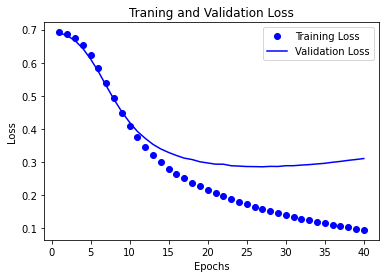

In [45]:
plt.plot(epochs, loss, 'bo', label="Training Loss") # label -> 범례 이름
plt.plot(epochs, val_loss, 'b', label="Validation Loss")

# 'bo'는 파란 점을 의미 / 'b'는 파란 실선을 의미

plt.title("Traning and Validation Loss") # 그래프 제목
plt.xlabel("Epochs") # x축 이름
plt.ylabel('Loss')   # y축 이름
plt.legend()

plt.show()

In [46]:
plt.clf() # 그래프 초기화

<Figure size 432x288 with 0 Axes>

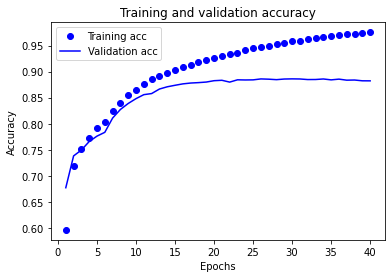

In [47]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [48]:
# 점선 : 훈련 손실과 훈련 정확도
# 실선 : 검증 손실과 검증 정확도

In [49]:
# 훈련 손실은 에포크마다 감소하고 훈련 정확도는 증가
# -> 경사하강법 최적화를 사용할 때면 볼 수 있는 현상
# -> 매 반복마다 최적화 대상의 값을 최소화 함

In [50]:
# 하지만 검증 손실과 검증 정확도에서는 그렇지 못함
# 약 20번째 에포크 이후가 최적점인 것으로 보임
# -> 이는 과대적합 때문임

# 이 지점 부터는 모델이 과도하게 최적화 되어 
# 테스트 데이터에서 일반화 되기 어려운 훈련 데이터의 특정 표현을 학습함

# 과대적합을 막기 위해 단순히 20번째 에포크 근처에서 훈련을 멈출 수 있음
# 콜백 (callback)을 사용하여 자동으로 이를 가능하게 할 수 있음